In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')

Libraries Imported


C:\Users\sampa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
cleanedset_original = pd.read_csv('C:/Users/sampa/OneDrive/Desktop/GMU/Spring_2021/Dataset/cleandata_q3q4.csv')
cleanedset_original.head(5)

,Shift,FireStation,FRDPersonnelStartDate,PatientOutcome,year,tenure,tenure_bin
0,A - Shift,4,1997-08-18,Standby (No Services Performed),1997,24,11+
1,A - Shift,1,2011-10-24,No Treatment/Transport Required,2011,10,4-10
2,B - Shift,19,2015-01-12,Patient Refusal (AMA),2015,6,4-10
3,A - Shift,35,2004-07-12,Treated & Transported,2004,17,11+
4,A - Shift,37,2012-09-24,Treated & Transported,2012,9,4-10


In [3]:
cleanup_nums = {"Shift": {"A - Shift": 1, "B - Shift": 2, "C - Shift" : 3},
               "PatientOutcome": {"Treated & Transported ": 1, "Standby (No Services Performed)": 2, 
                                   "Treated, Transferred Care ": 3, 
                                   "Standby (Operational Support Provided)": 4, 
                                  "Patient Refusal  (AMA)": 5, "Patient Dead at Scene (No EMS CPR)": 6,
                                   "Patient Dead at Scene (EMS CPR Attempted)": 7, "No Treatment/Transport Required": 8,
                                  "No Patient Found": 9, "EMS Assist (Other Agency)": 10, "Canceled (Prior to Arrival) ": 11,
                                  "Canceled (On Scene, No Patient Contact) ": 12}
}

In [4]:
cleanedset = cleanedset_original.replace(cleanup_nums)
cleanedset.head(5)

,Shift,FireStation,FRDPersonnelStartDate,PatientOutcome,year,tenure,tenure_bin
0,1,4,1997-08-18,2,1997,24,11+
1,1,1,2011-10-24,8,2011,10,4-10
2,2,19,2015-01-12,5,2015,6,4-10
3,1,35,2004-07-12,1,2004,17,11+
4,1,37,2012-09-24,1,2012,9,4-10


In [5]:
F = cleanedset[['Shift', 'FireStation', 'tenure', 'PatientOutcome']]

In [6]:
F.head(5)

,Shift,FireStation,tenure,PatientOutcome
0,1,4,24,2
1,1,1,10,8
2,2,19,6,5
3,1,35,17,1
4,1,37,9,1


In [7]:
#creating multiclass dependent variable
factor = pd.factorize(F['PatientOutcome'])
F.PatientOutcome = factor[0]
definitions = factor[1]
print(F.PatientOutcome.head())
print(definitions)

0    0
1    1
2    2
3    3
4    3
Name: PatientOutcome, dtype: int64
Int64Index([2, 8, 5, 1, 12, 9, 11, 4, 6, 3, 10, 7], dtype='int64')


C:\Users\sampa\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
#Splitting the data into independent and dependent variables
X = F.iloc[:,0:3].values
y = F.iloc[:,3].values
print('The independent features set: ')
print(X[:4,:])
print('The dependent variable: ')
print(y[:4])

The independent features set: 
[[ 1  4 24]
 [ 1  1 10]
 [ 2 19  6]
 [ 1 35 17]]
The dependent variable: 
[0 1 2 3]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
print(y_test)
print(y_train)

[3 3 1 ... 3 1 3]
[2 3 3 ... 2 2 1]


In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
print(list(zip(F.columns[0:3], classifier.feature_importances_)))
joblib.dump(classifier, 'randomforestmodel.pkl') 

[('Shift', 0.028284784699518357), ('FireStation', 0.5967222751279982), ('tenure', 0.3749929401724833)]


['randomforestmodel.pkl']

In [14]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.665 (0.000)


In [15]:
classifier.feature_importances_

array([0.02828478, 0.59672228, 0.37499294])

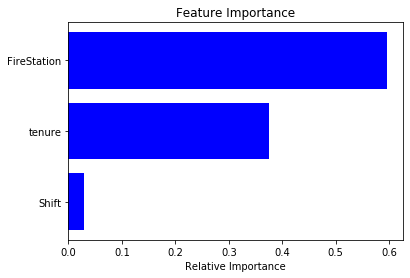

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

features = F.columns[[0,1,2]]
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()